In [1]:
# Load necessary packages
import numpy as np
import pandas as pd
import matplotlib as mpl

# Visualization modules
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Data-processing modules 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Modeling and evaluation modules 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

# Module for saving model
import pickle 

# Set seed for reproducibility 
SEED = 3

## Part I. Data Processing

a) Import the data from the website directly

In [2]:
adult_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                       header = None, skipinitialspace=True)

In [3]:
adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


b) Build the column names for your dataframe

In [4]:
# Create a list of column names 
list_of_columns = ["age", "workclass", "fnlwgt","education","education_num","marital_status","occupation","relationship",
                   "race","sex","capital_gain","capital_loss","hours_per_week","native_country","salary"]
# Pass the list of column names to dataframe 
adult_df.columns = list_of_columns
# Verify column names have been created 
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


c) Check your dataframe shape to verify that you have the correct # of rows and columns. You should get a shape of: (32561, 15)

In [5]:
adult_df.shape

(32561, 15)

d) Drop the 3rd column from the data (it is referred to as "fnlwgt" on UCI's website and is not necessary in this homework)

In [6]:
# Delete selected column
adult_df.drop('fnlwgt', axis=1, inplace=True)
adult_df.shape

(32561, 14)

e) Note: There are random values of  '?' that show up in the data - this is fine! These just refer to "unknown" and can be left as is. This data has no true NA values, so no need to check.

In [7]:
adult_df.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

f) Use the .replace() method to make the following changes to the "salary" column:
- "<=50K" should become 0
- ">50K" should become 1

Note: This step is essential to calculate the ROC_AUC score in model evaluation steps.

In [8]:
# Replace salary values with 0 and 1 
adult_df['salary'].replace(to_replace=['<=50K', '>50K'], value=[0, 1],inplace = True)
# Verify replacement  
adult_df['salary'].value_counts()

0    24720
1     7841
Name: salary, dtype: int64

g) Create your X dataframe (just your predictors). It should include every feature except for the target variable which is "salary". You should have the following shape: (32561, 13)

In [9]:
# Create X dataframe by dropping salary column 
X = adult_df.drop(['salary'], axis=1)
# Verify shape
X.shape

(32561, 13)

h) Create your y dataframe (just your target variable). It should only be "salary". You should have the following shape: (32561, ). The values should only be 0 and 1.

In [10]:
# Create y object
y = adult_df['salary']
# Verify shape and values 
print(y.shape)
print(y.values)

(32561,)
[0 0 0 ... 0 0 1]


i) For this homework we will try converting columns with factors to separate columns (i.e. one-hot encoding). It is not necessary for trees, but can be a very powerful tool to use. There are a variety of ways to do this, but we can use Pandas built-in method .get_dummies(). Pandas will automatically split out columns that are categorical. For now, just run across your full X dataframe. Your updated X dataframe should have the following shape: (32561, 107)

In [11]:
# Perform one-hot encoding on X dataframe 
X_encoded = pd.get_dummies(X)
X_encoded.shape

(32561, 107)

j) Split data into train / test set using an 70/30 split. Verify that you have the same number of columns in your X_train and X_test.

In [12]:
# Split into train and test data, randome_state = SEED for reproducibility
X_train, X_test, y_train, y_test= train_test_split(X_encoded, y, test_size=0.3, random_state = SEED)
# Verify column numbers for X_train and X_test 
print(X_train.shape)
print(X_test.shape)

(22792, 107)
(9769, 107)


## Part II. Random Forest Classifier - Base Model

Start by creating a simple Random Forest only using default parameters - this will let us compare Boosting methods to Random Forest in binary classification problems.

a) Use the RandomForestClassifier in sklearn. Fit your model on the training data.

In [13]:
# Create a Random Forest instance, set random_state = SEED for reproducibility
rf_base = RandomForestClassifier(random_state = SEED)
# Fit on X_train and y_train
rf_base.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

b) Use the fitted model to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

In [14]:
# Predict test data 
y_pred_base = rf_base.predict(X_test)
# Calculate predicted probabilities 
base_probs = rf_base.predict_proba(X_test)
# Show predicitions and predicted probabilities on the first 5 instances 
print(y_pred_base[0:5])
print(base_probs[0:5])

[1 1 1 1 0]
[[0.17833333 0.82166667]
 [0.35       0.65      ]
 [0.29       0.71      ]
 [0.4        0.6       ]
 [0.93       0.07      ]]


c) Calculate the confusion matrix and classification report (both are in sklearn.metrics).

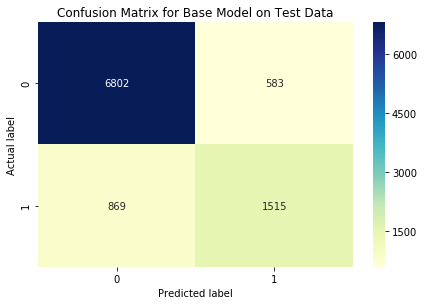

In [15]:
# Generate confusion matrix and classification report 
cnf_base_test = metrics.confusion_matrix(y_test, y_pred_base)
clr_base_test = metrics.classification_report(y_test, y_pred_base)

# Create Heatmap for Confusion Matrix 
sns.heatmap(cnf_base_test, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix for Base Model on Test Data', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Fix for mpl bug that cuts off top/bottom of seaborn visualization
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [16]:
# Print classification report
print(clr_base_test)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7385
           1       0.72      0.64      0.68      2384

    accuracy                           0.85      9769
   macro avg       0.80      0.78      0.79      9769
weighted avg       0.85      0.85      0.85      9769



d) Calculate the AUC score (we did this in HW #4 many times).

In [17]:
# Calculate roc_auc_score for class 1 
roc_auc_base_test = metrics.roc_auc_score(y_test, base_probs[:,1])
print(roc_auc_base_test)

0.8907305757634968


e) Identify the top 5 features. Feel free to print a list OR to make a plot.

In [18]:
# Understand feature importace 
importances_rf = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf_base.feature_importances_,3)})
importances_rf = importances_rf.sort_values('importance',ascending=False).set_index('feature')
importances_rf.head(5)

,importance
feature,
age,0.227
hours_per_week,0.113
capital_gain,0.102
marital_status_Married-civ-spouse,0.069
education_num,0.063


f) Using the model from part B, predict for the train data. Look at the classification report for the train data - is there overfitting for the RandomForest model happening?

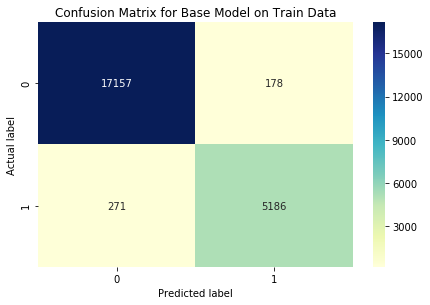

In [19]:
# Predict train data 
y_pred_base_train = rf_base.predict(X_train)

# Generate confusion matrix
cnf_base_train = metrics.confusion_matrix(y_train, y_pred_base_train)

# Create Heatmap for Confusion Matrix 
sns.heatmap(cnf_base_train, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix for Base Model on Train Data', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Fix for mpl bug that cuts off top/bottom of seaborn visualization
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [20]:
# Generate classification report 
clr_base_train = metrics.classification_report(y_train, y_pred_base_train)
print(clr_base_train)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     17335
           1       0.97      0.95      0.96      5457

    accuracy                           0.98     22792
   macro avg       0.98      0.97      0.97     22792
weighted avg       0.98      0.98      0.98     22792



In [21]:
# Calculate predicted probability 
base_train_probs = rf_base.predict_proba(X_train)
# Calculate roc_auc_score for class 1 
roc_auc_base_train = metrics.roc_auc_score(y_train, base_train_probs[:,1])
print(roc_auc_base_train)

0.9979236888828351


There are signs of overfitting since the accuracy and roc_auc_score of the train data (0.98 and 0.998) are higher than those of the test data (0.85 and 0.891). The classification reports of the train data suggest close to perfect classification for both classes, while the precision, recall and f1-score for class 1 in the test data are much lower, at about 0.7. All these signs suggest that the model has learned the pattern from the train data extremely well, including the noise, and thus the pattern in the train data cannot be applied to the test data and fail to achieve the same level of accuracy when making predictions on the test data.

## Part III. AdaBoost Classifier - Grid Search

Start by creating a simple AdaBoostClassifier only using default parameters. Note: sklearn defaults to a max_depth of 1 for AdaBoost. 

a) Use the AdaBoostClassifier along with the GridSearchCV tool. Run the GridSearchCV using the following:

- n_estimators: 100, 200, 300, 400
- learning_rate: 0.2,0.4,0.6,0.8,1, 1.2

Note: Feel free to try out more parameters, the above is the bare minimum for this assignment.

Use 5 cross-fold and for scoring use "roc_auc" (this is the score that will be referenced when identifying the best parameters).

In [22]:
# Start by creating an adaboost instance
ada_obj = AdaBoostClassifier(random_state = SEED)

# Create a dictionary of parameters 
param_grid1 = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.2, 0.4, 0.6, 0.8, 1, 1.2]}

# Create grid search object with various combinations of parameters
ada_Grid = GridSearchCV(ada_obj, param_grid1, cv = 5, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose = 5)

# Fit the grid search model on training data 
ada_Grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=3),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.4, 0.6, 0.8, 1, 1.2],
                         'n_estimators': [100, 200, 300, 400]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=5)

b) Use the best estimator from GridSearchCV to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

In [23]:
# Identify the best model from my grid search 
best_ada = ada_Grid.best_estimator_
best_ada 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.2,
                   n_estimators=400, random_state=3)

In [24]:
# Predict test data using best model
y_pred_best_ada = best_ada.predict(X_test)
# Calculate predicted probabilities 
best_ada_probs = best_ada.predict_proba(X_test)
# Show predicitions and predicted probabilities on the first 5 instances 
print(y_pred_best_ada[0:5])
print(best_ada_probs[0:5])

[1 0 1 1 0]
[[0.49825105 0.50174895]
 [0.50008823 0.49991177]
 [0.4998704  0.5001296 ]
 [0.49962191 0.50037809]
 [0.50111902 0.49888098]]


c) Calculate the confusion matrix and classification report (both are in sklearn.metrics).

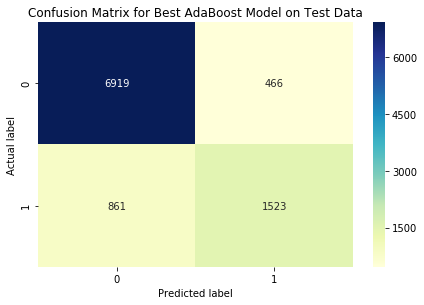

In [25]:
# Generate confusion matrix and classification report for test data
cnf_best_ada_test = metrics.confusion_matrix(y_test, y_pred_best_ada)
clr_best_ada_test = metrics.classification_report(y_test, y_pred_best_ada)

# Create Heatmap for Confusion Matrix 
sns.heatmap(cnf_best_ada_test, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix for Best AdaBoost Model on Test Data', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Fix for mpl bug that cuts off top/bottom of seaborn visualization
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [26]:
# Print classification report 
print(clr_best_ada_test)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7385
           1       0.77      0.64      0.70      2384

    accuracy                           0.86      9769
   macro avg       0.83      0.79      0.80      9769
weighted avg       0.86      0.86      0.86      9769



d) Calculate the AUC score

In [27]:
# Calculate roc_auc_score for class 1 
roc_auc_best_ada_test = metrics.roc_auc_score(y_test, best_ada_probs[:,1])
print(roc_auc_best_ada_test)

0.9240588634225917


e) Identify the top 5 features. Feel free to print a list OR to make a plot.

In [28]:
# Understand feature importace 
importances_ada = pd.DataFrame({'feature':X_train.columns,'importance':np.round(best_ada.feature_importances_,3)})
importances_ada = importances_ada.sort_values('importance',ascending=False).set_index('feature')
importances_ada.head(5)

,importance
feature,
capital_gain,0.385
capital_loss,0.252
age,0.088
hours_per_week,0.072
education_num,0.015


f) Using the model from part (b), predict for the train data. Look at the classification report for the train data - is there overfitting for the best estimator?

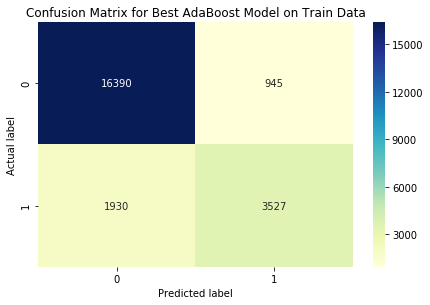

In [29]:
# Predict train data 
y_pred_best_ada_train = best_ada.predict(X_train)

# Generate confusion matrix
cnf_best_ada_train = metrics.confusion_matrix(y_train, y_pred_best_ada_train)

# Create Heatmap for Confusion Matrix 
sns.heatmap(cnf_best_ada_train, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix for Best AdaBoost Model on Train Data', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Fix for mpl bug that cuts off top/bottom of seaborn visualization
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [30]:
# Generate classification report 
clr_best_ada_train = metrics.classification_report(y_train, y_pred_best_ada_train)
print(clr_best_ada_train)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     17335
           1       0.79      0.65      0.71      5457

    accuracy                           0.87     22792
   macro avg       0.84      0.80      0.81     22792
weighted avg       0.87      0.87      0.87     22792



In [31]:
# Calculate predicted probability 
best_ada_train_probs = best_ada.predict_proba(X_train)

# Calculate roc_auc_score for class 1 
roc_auc_best_ada_train = metrics.roc_auc_score(y_train, best_ada_train_probs[:,1])
print("ROC_AUC_Score:", roc_auc_best_ada_train)

ROC_AUC_Score: 0.9324860557293012


There is no sign of overfitting since the roc_auc_score and the accuracy of the train data are very similar to those of the test data. The precision, recall and f1 scores for each class are also quite similar between the train and test data. These signs suggest that the model learns the general pattern from the train data (without learning the noise) and is able to apply this pattern to the test data to predict at the same level of accuracy. 

## Part IV. Gradient Boosting Classifier - GridSearch

a) Use GradientBoostingClassifier along with the GridSearchCV tool. Run the GridSearchCV using the following hyperparameters:
- n_estimators: 100,200, 300 & 400
- learning_rate: choose 3 learning rates of your choice
- max_depth: 1, 2 (you can try deeper, but remember part of the value of boosting stems from minimal complexity of trees)

Note: Feel free to try out more parameters, the above is the bare minimum for this assignment.

Use 5 cross-fold and for scoring use "roc_auc" (this is the score that will be referenced when identifying the best parameters).

In [32]:
# Create a gradient boosting instance 
gb_obj = GradientBoostingClassifier(random_state = SEED)

# Create a dictionary of parameters 
param_grid2 = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.2, 0.4, 0.6, 0.8, 1, 1.2],
    'max_depth': [1, 2, 3]}

# Create grid search object with various combinations of parameters
gb_Grid = GridSearchCV(gb_obj, param_grid2, cv = 5, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose = 5)

# Fit the grid search model
gb_Grid.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed: 10.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

b) Use the best estimator from GridSearchCV to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

In [33]:
# Identify the best model from my grid search 
best_gb = gb_Grid.best_estimator_
best_gb

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [34]:
# Predict test data using best model
y_pred_best_gb = best_gb.predict(X_test)
# Calculate predicted probabilities 
best_gb_probs = best_gb.predict_proba(X_test)
# Show predicitions and predicted probabilities on the first 5 instances 
print(y_pred_best_gb[0:5])
print(best_gb_probs[0:5])

[1 1 1 1 0]
[[0.02408334 0.97591666]
 [0.46279967 0.53720033]
 [0.389822   0.610178  ]
 [0.44659901 0.55340099]
 [0.9009598  0.0990402 ]]


c) Calculate the confusion matrix and classification report (both are in sklearn.metrics).

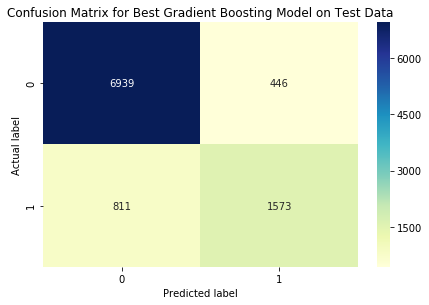

In [35]:
# Generate confusion matrix and classification report for test data
cnf_best_gb_test = metrics.confusion_matrix(y_test, y_pred_best_gb)
clr_best_gb_test = metrics.classification_report(y_test, y_pred_best_gb)

# Create Heatmap for Confusion Matrix 
sns.heatmap(cnf_best_gb_test, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix for Best Gradient Boosting Model on Test Data', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Fix for mpl bug that cuts off top/bottom of seaborn visualization
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [36]:
# Print classification report 
print(clr_best_gb_test)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7385
           1       0.78      0.66      0.71      2384

    accuracy                           0.87      9769
   macro avg       0.84      0.80      0.82      9769
weighted avg       0.87      0.87      0.87      9769



d) Calculate the AUC score

In [37]:
# Calculate roc_auc_score for class 1 
roc_auc_best_gb_test = metrics.roc_auc_score(y_test, best_gb_probs[:,1])
print(roc_auc_best_gb_test)

0.9258797080968588


e) Identify the top 5 features. Feel free to print a list OR to make a plot.

In [38]:
# Understand feature importace 
importances_gb = pd.DataFrame({'feature':X_train.columns,'importance':np.round(best_gb.feature_importances_,3)})
importances_gb = importances_gb.sort_values('importance',ascending=False).set_index('feature')
importances_gb.head(5)

,importance
feature,
marital_status_Married-civ-spouse,0.354
capital_gain,0.191
education_num,0.178
age,0.068
capital_loss,0.062


f) Using the model from part (b), predict for the train data. Look at the classification report for the train data - is there overfitting for the best estimator?

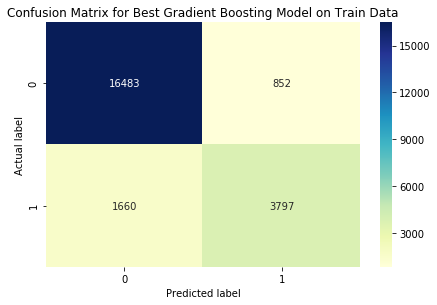

In [39]:
# Predict train data 
y_pred_best_gb_train = best_gb.predict(X_train)

# Generate confusion matrix
cnf_best_gb_train = metrics.confusion_matrix(y_train, y_pred_best_gb_train)

# Create Heatmap for Confusion Matrix 
sns.heatmap(cnf_best_gb_train, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix for Best Gradient Boosting Model on Train Data', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Fix for mpl bug that cuts off top/bottom of seaborn visualization
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [40]:
# Generate classification report 
clr_best_gb_train = metrics.classification_report(y_train, y_pred_best_gb_train)
print(clr_best_gb_train)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     17335
           1       0.82      0.70      0.75      5457

    accuracy                           0.89     22792
   macro avg       0.86      0.82      0.84     22792
weighted avg       0.89      0.89      0.89     22792



In [41]:
# Calculate predicted probability 
best_gb_train_probs = best_gb.predict_proba(X_train)

# Calculate roc_auc_score for class 1 
roc_auc_best_gb_train = metrics.roc_auc_score(y_train, best_gb_train_probs[:,1])
print("ROC_AUC_Score:", roc_auc_best_gb_train)

ROC_AUC_Score: 0.9465170838491394


There is no sign of overfitting since the roc_auc_score and the accuracy of the train data are quite close to those of the test data. The precision, recall and f1 scores for each class are also quite similar between the train and test data. These signs suggest that the model learns the general pattern from the train data (without learning the noise) and is able to apply this pattern to the test data to predict at almost the same level of accuracy. 

## Part V. XGBoost - RandomizedSearchCV

Repeat 4(a) - 4(f) with xgboost and RandomizedSearchCV.

For 4a use the following parameters: 
- n_estimators: 100-1000 in increments of 50  (i.e. 100,150,200,.....1000)
- learning_rate: 0.1 - 1.6 in increments of 0.1
- max_depth: 1, 2
- gamma: 0 - 5 in increments of 0.25

For RandomizedSearchCV make sure to still use cv = 5 and for scoring use "roc_auc".

a) Use XGBoostClassifier along with the RandomizedSearchCV tool.

In [42]:
# Create an XGBoost instance  
xgb_obj = xgb.XGBClassifier(random_state = SEED)

# Create a dictionary of parameters 
param_grid3 = {
    'n_estimators': np.arange(100, 1020, 50),
    'learning_rate': np.arange(0.1, 1.7, 0.1),
    'max_depth': [1, 2],
    'gamma': np.arange(0, 5.1, 0.25)}

# Create randomized search object with various combinations of parameters
xgb_random = RandomizedSearchCV(xgb_obj, param_grid3, cv = 5, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose = 5)

# Fit the grid search model
xgb_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed: 49.4min remaining:  4.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 49.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=3, reg_alpha=0,
                                           reg_lambda=1, sc...
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
                                        'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,

b) Use the best estimator from RandomizedSearchCV to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

In [43]:
# Identify the best model from my grid search 
best_xgb = xgb_random.best_estimator_
best_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0,
              learning_rate=0.8, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=450, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=3,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [44]:
# Predict test data using best model
y_pred_best_xgb = best_xgb.predict(X_test)
# Calculate predicted probabilities 
best_xgb_probs = best_xgb.predict_proba(X_test)
# Show predicitions and predicted probabilities on the first 5 instances 
print(y_pred_best_xgb[0:5])
print(best_xgb_probs[0:5])

[1 1 1 1 0]
[[0.00458109 0.9954189 ]
 [0.47659868 0.5234013 ]
 [0.42642325 0.57357675]
 [0.39645642 0.6035436 ]
 [0.8947647  0.1052353 ]]


c) Calculate the confusion matrix and classification report (both are in sklearn.metrics).

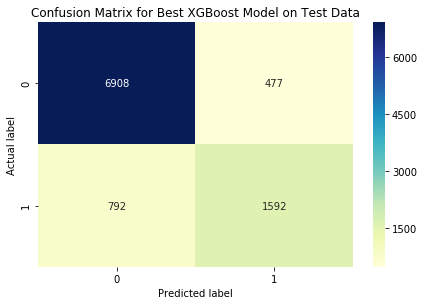

In [45]:
# Generate confusion matrix and classification report for test data
cnf_best_xgb_test = metrics.confusion_matrix(y_test, y_pred_best_xgb)
clr_best_xgb_test = metrics.classification_report(y_test, y_pred_best_xgb)

# Create Heatmap for Confusion Matrix 
sns.heatmap(cnf_best_xgb_test, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix for Best XGBoost Model on Test Data', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Fix for mpl bug that cuts off top/bottom of seaborn visualization
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [46]:
# Print classification report 
print(clr_best_xgb_test)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7385
           1       0.77      0.67      0.72      2384

    accuracy                           0.87      9769
   macro avg       0.83      0.80      0.82      9769
weighted avg       0.87      0.87      0.87      9769



d) Calculate the AUC score

In [47]:
# Calculate roc_auc_score for class 1 
roc_auc_best_xgb_test = metrics.roc_auc_score(y_test, best_xgb_probs[:,1])
print(roc_auc_best_xgb_test)

0.9252905853966638


e) Identify the top 5 features. Feel free to print a list OR to make a plot.

In [48]:
# Understand feature importace 
importances_xgb = pd.DataFrame({'feature':X_train.columns,'importance':np.round(best_xgb.feature_importances_,3)})
importances_xgb = importances_xgb.sort_values('importance',ascending=False).set_index('feature')
importances_xgb.head(5)

,importance
feature,
marital_status_Married-civ-spouse,0.438
education_num,0.071
capital_gain,0.032
occupation_Farming-fishing,0.028
occupation_Exec-managerial,0.026


f) Using the model from part (b), predict for the train data. Look at the classification report for the train data - is there overfitting for the best estimator?

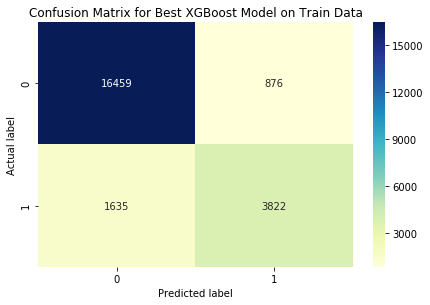

In [49]:
# Predict train data 
y_pred_best_xgb_train = best_xgb.predict(X_train)

# Generate confusion matrix
cnf_best_xgb_train = metrics.confusion_matrix(y_train, y_pred_best_xgb_train)

# Create Heatmap for Confusion Matrix 
sns.heatmap(cnf_best_xgb_train, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix for Best XGBoost Model on Train Data', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Fix for mpl bug that cuts off top/bottom of seaborn visualization
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [50]:
# Generate classification report 
clr_best_xgb_train = metrics.classification_report(y_train, y_pred_best_xgb_train)
print(clr_best_xgb_train)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     17335
           1       0.81      0.70      0.75      5457

    accuracy                           0.89     22792
   macro avg       0.86      0.82      0.84     22792
weighted avg       0.89      0.89      0.89     22792



In [51]:
# Calculate predicted probability 
best_xgb_train_probs = best_xgb.predict_proba(X_train)

# Calculate roc_auc_score for class 1 
roc_auc_best_xgb_train = metrics.roc_auc_score(y_train, best_xgb_train_probs[:,1])
print("ROC_AUC_Score:", roc_auc_best_xgb_train)

ROC_AUC_Score: 0.9477245416468656


There is no sign of overfitting since the roc_auc_score and the accuracy of the train data are very close to those of the test data. The precision, recall and f1 scores for each class are also quite similar between the train and test data. These signs suggest that the model learns the general pattern from the train data (without learning the noise) and is able to apply this pattern to the test data to predict at the same level of accuracy. 

## Part VI. Conceptual Questions

a) What does the alpha parameter represent in AdaBoost? Please refer to chapter 7 of the Hands-On ML book if you are struggling.

The alpha paramater represents the predictor's weight in AdaBoost. AdaBoost is an ensemble learning algorithm that employs a stage-wise additive method to pay more attention to the misclassified training instances and correct the previous predictor. Each observation is assigned the same weight at first, say 1/m. A first predictor is trained and its weighted error r is computed on the training set (formula shown below).  

<img src="weighted_error.jpg" style="width:450px;height:100px/">

Then the predictor's weight, alpha, is computed using the following mathematical formula: 

<img src="predictor_weight.jpg" style="width:300px;height:100px/">

where eta is the learning rate hyperparameter and r_j is the weighted error rate of the j-th predictor.
The more accurate the predictor (aka the smaller the error rate), the higher the alpha. If the error rate is lower than 0.5, then alpha will be positive. If error rate is 0.5, the alpha will be 0. In the case that the error rate is greater than 0.5, then the alpha will take on a negative value. 

Next, the instance weights are updated using the equation below, followed by normalization. We would increase the weights of the misclassified instances and decrease the weights of the correctly classified instances. The algorithm is then forced to pay more attention classifying the instances with increased weights. This process is repeated until the desired number of predictors is reached, or when a perfect predictor is found. 

<img src="weight_update.jpg" style="width:220px;height:100px/">

b) In AdaBoost explain how the final predicted class is determined. Be sure to reference the alpha term in your explanation.

To make predictions, AdaBoost combines all the predictors and weighs them using the predictor weights alpha. The predicted class is the one that receives the majority of the weighted votes.   

<img src="adaboost_pred.jpg" style="width:400px;height:90px/">

The alpha, which represents predictor weights, is an important parameter in AdaBoost. The alpha can determine how good the classifier is at each round by taking into account the error made by the classifier. If error is large, alpha is small so we don't pay much attention to that classifier. 

c) In Gradient Boosting, what is the role of the max_depth parameter? Why is it important to tune on this parameter?

Gradient Boosting is another stage-wise additive algorithm that works by sequentially adding predictors to an ensemble, each one correcting its predecessor. After first building a decision tree to fit the training data, the algorithm then builds another tree to fit the residual errors made by the first decision tree. Combining these two decision tree predictors yield a better predictor (this is referred to as boosting), and then another tree is built to fit the residual errors made by this previous predictor. Such process is repeated until the desired number of predictor is reached (can be specified through n_estimators, such number can be found through early-stopping), or when a perfect predictor is found.

Since gradient boosting builds trees as predictors, max_depth is an important parameter that is used to control the maximum depth of individual trees. Deeper trees would have more splits, and they can better classify the training data. So deeper tree lead to lower bias. Yet the increase of tree depth can also result in the trees learning the noise from the training data and suffering from overfitting, rendering the model unable to be generalized on unseen data. Therefore, it is important that we tune this max_depth parameter in order to prevent the model from overfitting the training data. It is also useful to note that gradient boosting builds stumps (shallow trees) as weak learners for mininal complexity of trees so it is recommended to prune the trees to find the optimal balance between bias and variance and obtain the best-performing model.. 

d) In Part (e) of Steps 2-5 you determined the top 5 predictors across each model. Do any predictors show up in the top 5 predictors for all three models? If so, comment on if this predictor makes sense given what you are attempting to predict. (Note: If you don't have any predictors showing up across all 3 predictors, explain one that shows up in 2 of them).

In [59]:
print("Top 5 Predictors in Random Forest Base Model")
print(importances_rf.head(5))
print("*"*60)
print("Top 5 Predictors in Best AdaBoost Model")
print(importances_ada.head(5))
print("*"*60)
print("Top 5 Predictors in Best Gradient Boosting Model")
print(importances_gb.head(5))
print("*"*60)
print("Top 5 Predictors in Best XGBoost Model")
print(importances_xgb.head(5))

Top 5 Predictors in Random Forest Base Model
                                   importance
feature                                      
age                                     0.227
hours_per_week                          0.113
capital_gain                            0.102
marital_status_Married-civ-spouse       0.069
education_num                           0.063
************************************************************
Top 5 Predictors in Best AdaBoost Model
                importance
feature                   
capital_gain         0.385
capital_loss         0.252
age                  0.088
hours_per_week       0.072
education_num        0.015
************************************************************
Top 5 Predictors in Best Gradient Boosting Model
                                   importance
feature                                      
marital_status_Married-civ-spouse       0.354
capital_gain                            0.191
education_num                           0.178
age

We see repetition among the top 5 predictors across the 4 models. Capital_gain and education_num show up as a top 5 predictor across the models, which make sense given we're trying to predict whether a person makes over 50K a year or not. An individual's income is highly related to capital gains since higher capital gains are related to a larger amount of capital investment, which is more likely to happen if the person has high salary. The number of years of education is also an important factor since the more education one receives, the individual is more likely to take on a more skilled and hence more generously compensated job. 

e) From the models run in steps 2-5, which performs the best based on the Classification Report? Support your reasoning with evidence from your test data and be sure to share the optimal hyperparameters found from your grid search.

In [53]:
# Print out classification reports for comparison 
print("Classification Report for Random Forest Base Model")
print(clr_base_test)
print("*"*60)
print("Classification Report for Best AdaBoost Model")
print(clr_best_ada_test)
print("*"*60)
print("Classification Report for Best Gradient Boosting Model")
print(clr_best_gb_test)
print("*"*60)
print("Classification Report for Best XGBoost Model")
print(clr_best_xgb_test)

Classification Report for Random Forest Base Model
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7385
           1       0.72      0.64      0.68      2384

    accuracy                           0.85      9769
   macro avg       0.80      0.78      0.79      9769
weighted avg       0.85      0.85      0.85      9769

************************************************************
Classification Report for Best AdaBoost Model
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7385
           1       0.77      0.64      0.70      2384

    accuracy                           0.86      9769
   macro avg       0.83      0.79      0.80      9769
weighted avg       0.86      0.86      0.86      9769

************************************************************
Classification Report for Best Gradient Boosting Model
              precision    recall  f1-score   support

           0     

In [57]:
print("ROC_AUC score of Gradient Boosting Model on Test Data:", roc_auc_best_gb_test)
print("ROC_AUC score of XGBoost Model on Test Data:",roc_auc_best_xgb_test)

ROC_AUC score of Gradient Boosting Model on Test Data: 0.9258797080968588
ROC_AUC score of XGBoost Model on Test Data: 0.9252905853966638


The Gradient Boosting model is the best performing model. To be honest it was very difficult to decide between Gradient Boosting model and XGBoost model since they have the same accuracy and almost the same precision, recall and f1-score for each class. I took the additional step of looking at the ROC_AUC scores of the two models and the number for the gradient boosting model is slightly better, down to the 4th decimal place. 

In [54]:
# Show parameters from the best Gradient Boosting model 
gb_Grid.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}

f) For your best performing model, plot out a ROC curve using your test data. Feel free to use sklearn, matplotlib or any other method in python. Describe what the x-axis & y-axis of the ROC curve tell us about a classifier.

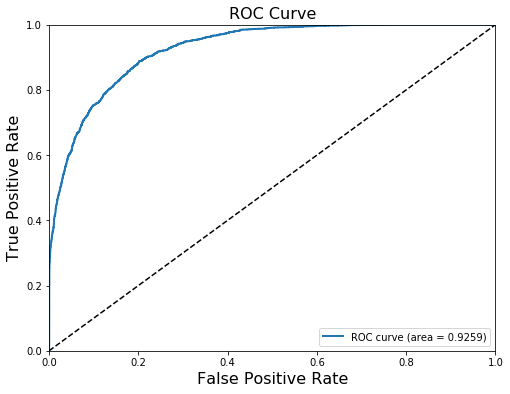

In [56]:
# First compute ROC curve area and score for each class  
fpr, tpr, thresholds = metrics.roc_curve(y_test, best_gb_probs[:,1])
roc_auc = metrics.roc_auc_score(y_test, best_gb_probs[:,1])

# Create a function to plot ROC curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve', fontsize = 16)
    plt.legend(loc = 'lower right')

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

The x-axis of the ROC curve represents the false positive rate and the y-axis represents the true positive rate. 
False positive rate refers to the ratio of negative events wrongly categorized as positive out of the total number of actual negatives, while true positives refers to the ratio of actual positive events correctly identified as such. 

## Final Note

In [58]:
adult_df['salary'].value_counts()

0    24720
1     7841
Name: salary, dtype: int64

One note to make for our binary classification is that we have class imbalance in our dataset. The number of 0's (those who don't make above 50K a year) are 3 times greater than the number of 1's (those who earn >50K in annual salary). If we want to make further attempts to improve prediction performance, I would suggest using oversampling techniques, either SMOTE or ADASYN, to create synthetic data of the minor class to achieve balance between the two classes before preceeding with modeling.